Veena Ghorakavi

In [217]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
#Please comment out this line of code if unnecessary
#uploaded = files.upload()

In [218]:
Data = pd.read_csv("concrete.csv")
Data.head(10) #several missing values!

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [219]:
Data.shape

(1030, 9)

In [220]:
Data.info

<bound method DataFrame.info of       cement   slag    ash  water  ...  coarseagg  fineagg  age  strength
0      141.3  212.0    0.0  203.5  ...      971.8    748.5   28     29.89
1      168.9   42.2  124.3  158.3  ...     1080.8    796.2   14     23.51
2      250.0    0.0   95.7  187.4  ...      956.9    861.2   28     29.22
3      266.0  114.0    0.0  228.0  ...      932.0    670.0   28     45.85
4      154.8  183.4    0.0  193.3  ...     1047.4    696.7   28     18.29
...      ...    ...    ...    ...  ...        ...      ...  ...       ...
1025   135.0    0.0  166.0  180.0  ...      961.0    805.0   28     13.29
1026   531.3    0.0    0.0  141.8  ...      852.1    893.7    3     41.30
1027   276.4  116.0   90.3  179.6  ...      870.1    768.3   28     44.28
1028   342.0   38.0    0.0  228.0  ...      932.0    670.0  270     55.06
1029   540.0    0.0    0.0  173.0  ...     1125.0    613.0    7     52.61

[1030 rows x 9 columns]>

In [221]:
Data.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [222]:
Data.isnull().values.any() 

False

In [223]:
Data.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [224]:
dff=pd.get_dummies(Data, drop_first=True)
dff.shape

(1030, 9)

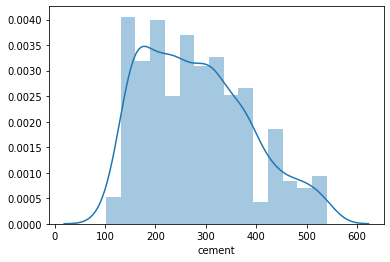

In [225]:
sns.distplot(Data['cement'])

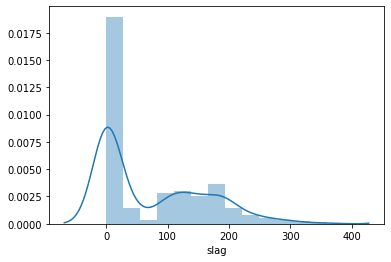

In [226]:
sns.distplot(Data['slag'])

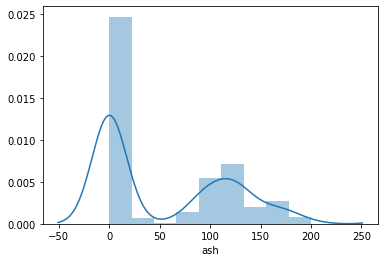

In [227]:
sns.distplot(Data['ash'])

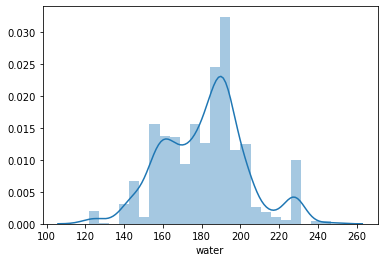

In [228]:
sns.distplot(Data['water'])

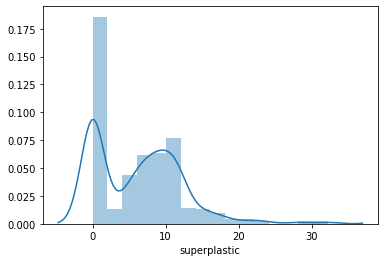

In [229]:
sns.distplot(Data['superplastic'])

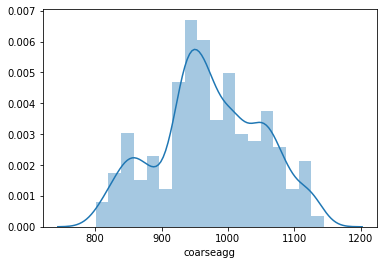

In [230]:
sns.distplot(Data['coarseagg'])

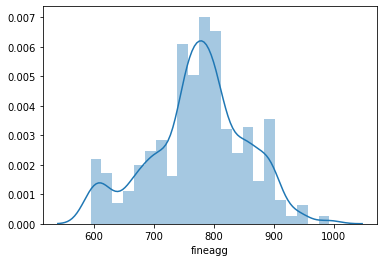

In [231]:
sns.distplot(Data['fineagg'])

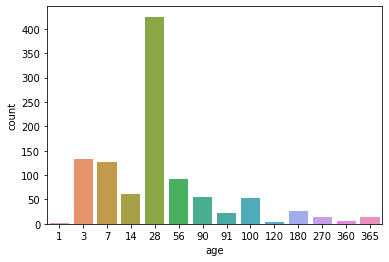

In [232]:
sns.countplot(Data['age'])

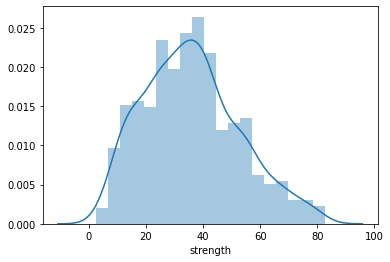

In [233]:
sns.distplot(Data['strength'])

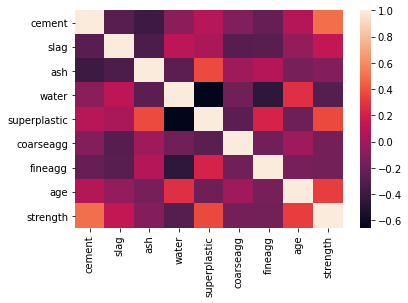

In [234]:
sns.heatmap(Data.corr(), xticklabels = Data.columns.values, yticklabels = Data.columns.values)

In [235]:
cor= dff.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.8) | (cor< -0.8)]

Series([], dtype: float64)

In [236]:
X = Data.iloc[:, 1:9].values 
y = Data.iloc[:, 7].values 
print(X.shape)
print(y.shape)
print(Data.info())

(1030, 8)
(1030,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


In [237]:
from sklearn.model_selection import train_test_split

y = dff['strength']
X = dff.loc[:, dff.columns != 'strength']

X_train, X_test, y_train, y_test = train_test_split (X.astype(int), y.astype(int), test_size=0.3, random_state=42,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 8), (309, 8), (721,), (309,))

Feature Selection

In [238]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [239]:
x = Data.drop('strength', axis = 1)
y = Data['strength']

In [240]:
x_train, x_test, y_train, y_test = train_test_split(x.astype(int), y.astype(int), test_size=0.30, random_state=1)
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)
x.shape

Training dataset shape: (721, 8) (721,)
Testing dataset shape: (309, 8) (309,)


(1030, 8)

In [241]:
# Build Lin Reg  to use in feature selection
linR = LinearRegression()

In [242]:
# Train MSE
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
predictedMpg = regression_model.predict(X_train)
print(mean_squared_error(predictedMpg, y_train))

269.3223454945302


Pipeline

In [243]:
#PCA - to reduce dimensions
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 

pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=3)), ('clf', LogisticRegression(random_state=1))]) 
pipe_lr.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.023
